# SEMANA 9

In [1]:
# Importamos las librerias que se utilizaran
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
import matplotlib
plt.style.use('classic')

Se cargan datos experimentales

Valores verdaderos:
    a=-0.95
    b=4.29
    f = 0.534

In [2]:
data = np.load('fit_ejercise.npy')

Se grafican los datos

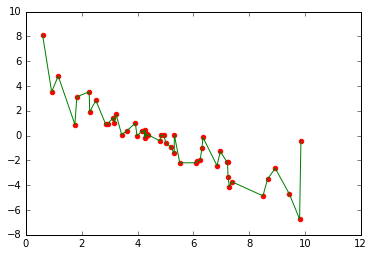

In [4]:
plt.scatter(data[0], data[1], color='red')
plt.plot(data[0], data[1], color='green')

In [98]:
data[2]

array([0.16031433, 0.5131704 , 0.40153006, 0.372534  , 0.27138192,
       0.25206039, 0.30851111, 0.44065038, 0.53772842, 0.35521117,
       0.43465689, 0.39296828, 0.41245175, 0.43734453, 0.52117122,
       0.14159749, 0.48184142, 0.22183319, 0.19711148, 0.38622848,
       0.14785626, 0.54266341, 0.41362449, 0.46170818, 0.1080646 ,
       0.39721594, 0.3783926 , 0.17947982, 0.17653526, 0.44776476,
       0.25938321, 0.44598515, 0.37719162, 0.29447529, 0.56256624,
       0.520835  , 0.27869878, 0.12179573, 0.25238404, 0.29909284,
       0.45247942, 0.59767924, 0.27795743, 0.48127391, 0.39658846,
       0.4458509 , 0.17556373, 0.29943815, 0.22042795, 0.27172801])

Definimos una funcion llamada linea que corresponde al modelo a evaluar en este ejercicio

In [5]:
def line(x, m, b):
    return(m * x + b)

Graficamos el conjunto original y con el error asociado

<function matplotlib.pyplot.show(*args, **kw)>

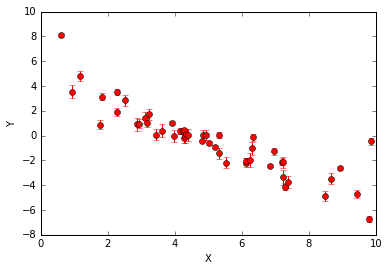

In [31]:
fig, ax = plt.subplots()
ax.errorbar(data[0], data[1], yerr=data[2],fmt='o', c='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

Se definen las siguientes funciones para obtener el logaritmo natural de likelihood, evaluar una cadena de Markov, obtener el prior y el logaritmo de posterior. 

In [203]:
def lnlh(theta):
    modelo=line(data[0], theta[0],theta[1]) # Se evalua el modelo en todos los datos independientes o 'x' del experimento
    diferencia = data[1] - modelo # Se compara el modelo con los datos
    u=0
    u = np.dot(diferencia, .2) # Se multiplica la diferencia por la matriz de desviaciones
    u = np.dot(u,diferencia.T) # Se multiplica el valor pasado por la diferencia
    u = -0.5 * np.sum(u) #Se multiplica por -1/2 y se suman los valores
    return u

def Markov(theta1, thetap): # Se ingresa con un punto inicial y con un punto de prueba
    p1 = lnlh(theta1) # Se evalua el likelihood para el primer punto
    pp = lnlh(thetap) # Se evalua el likelihood para el segundo punto
    if(pp>p1): # Se acepta el nuevo punto si el likelihood es mayor al punto anterior
        return thetap
    else: #Si es menor, segenera un punto aleatorio entre 0 y 1
        w = np.random.rand()
        if(pp-p1>np.log(w)): # Si la diferencia entre los likelihoods del nuevo punto menos el punto antorior es mayor al
                            # aleatorio, se acepta el nuevo punto
            return thetap
        else:
            return theta1 # Si no es mayor, se rechaza y se genera otro punto en otra cadena
    return

def priors(pars, plist):
    a, b = pars
    if plist[0]<a<plist[1] and plist[2]<b<plist[3]:
        return 0.0
    return -np.inf


def log_post(pars,z,data,cov,plist):
    prior = priors(pars,plist)
    if not np.isfinite(prior):
        return -np.inf
    return prior + lnlh(pars,z,data,cov)


In [242]:
Nmuestras = 10000
sigma1 = 0.05
sigma2 = 0.05

Ncadenas = 8
thetas = [1,0.1]
cadenas = []


for j in range(Ncadenas):
    thetas = np.array([np.random.normal(np.random.uniform(-1, .0100), sigma1), np.random.normal(thetas[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetas
        else:
            thetat = np.array([np.random.normal(thetas[0], sigma1), np.random.normal(thetas[1], sigma2)])
            thetanuevo = Markov(thetas, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetas = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

In [210]:
len(cadenas[0:Nmuestras,0])

10000

In [267]:
cadenas.shape

(80000, 2)

In [268]:
mediasx = []
mediasy = []


for i in range(Ncadenas):
    promcx = cadenas[(i)*Nmuestras+1:Nmuestras*(i+1),0].mean()
    promcy = cadenas[(i)*Nmuestras+1:Nmuestras*(i+1),1].mean()
    mediasx.append(promcx)
    mediasy.append(promcy)
mux = np.asarray(mediasx).mean() 
muy = np.asarray(mediasy).mean()

s2ixs = []
s2iys = []

for i in range(Ncadenas):
    s2ix = (1/(len(cadenas[0:Nmuestras,0])-1))*np.sum((cadenas[(i)*Nmuestras+1:Nmuestras*(i+1),0]-mediasx[i])**2)
    s2iy = (1/(len(cadenas[0:Nmuestras,1])-1))*np.sum((cadenas[(i)*Nmuestras+1:Nmuestras*(i+1),1]-mediasy[i])**2)
    s2ixs.append(s2ix)
    s2iys.append(s2iy)
    
s2x = np.asarray(s2ixs).mean()
s2y = np.asarray(s2iys).mean()

In [255]:
mediasx

[-0.8739409205080175,
 -0.9951862268738232,
 -1.0009393317246547,
 -1.0265631461251457,
 -1.0581925947716022,
 -1.0130470919508967,
 -1.0076318684543843,
 -0.9549807530194806]

In [248]:
mediasy

[3.920664632217579,
 4.649420992436499,
 4.706902486089126,
 4.8767982730873625,
 5.027593239244169,
 4.74726577086691,
 4.727401630451636,
 4.420908261197403]

In [256]:
mux

-0.9913102416785007

In [257]:
muy

4.634619410698836

In [269]:
s2ixs

[0.034450160656431465,
 0.01918210132064264,
 0.01555351806687987,
 0.015277313071120863,
 0.011679245639795615,
 0.024531708011126085,
 0.019456543516954947,
 0.012252411200023846]

In [270]:
s2iys

[1.1889264401523436,
 0.5879587682124491,
 0.4444642625832633,
 0.32534091655092207,
 0.2992882549839867,
 0.7845323018482228,
 0.5744221748652725,
 0.33085579158513123]

In [271]:
s2x

0.019047875185371915

In [272]:
s2y

0.5669736138476988

In [236]:
bny

0.00805459848888139

In [263]:
bnx =  (1/(Ncadenas-1))*sum((mediasx-mux)**2)
bny =  (1/(Ncadenas-1))*sum((mediasy-muy)**2)

In [275]:
sigma2x = (Nmuestras-1) * (s2x ** 2) / Nmuestras + bnx
sigma2y = (Nmuestras-1) * (s2y ** 2) / Nmuestras + bny

In [276]:
rx = np.sqrt(sigma2x/s2x)
rx

0.42600357397428834

In [277]:
ry = np.sqrt(sigma2y/s2y)
ry

0.8759481542045221

In [240]:
s2x

0.022961753575557138

In [241]:
np.sqrt(4)

2.0

In [149]:
s2i

0.03467477046218078

In [221]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

x = cadenas[:,0]
y = cadenas[:,1]


Text(0,0.5,'b')

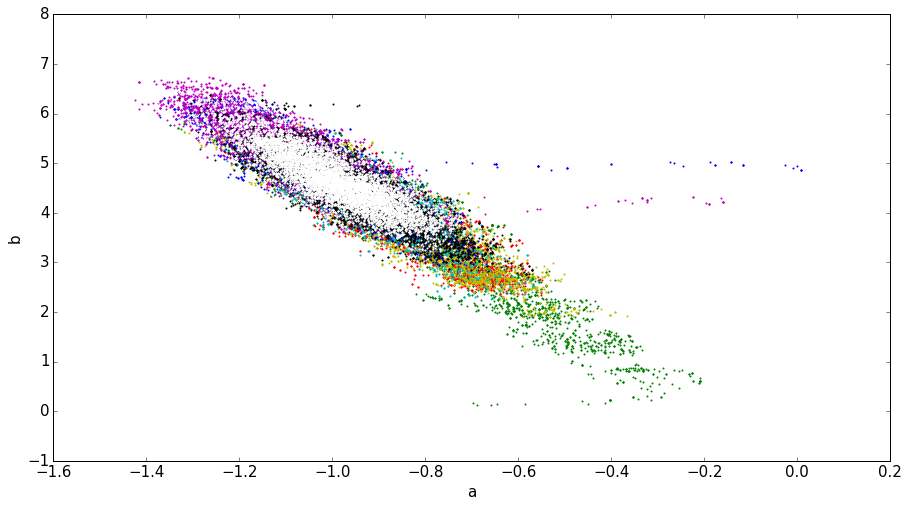

In [243]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.scatter(x1, y1, color = 'g',s=1)
plt.scatter(x2, y2, color = 'r',s=1)
plt.scatter(x3, y3, color = 'y',s=1)
plt.scatter(x4, y4, color = 'b',s=1)
plt.scatter(x5, y5, color = 'c',s=1)
plt.scatter(x6, y6, color = 'm',s=1)
plt.scatter(x7, y7, color = 'k',s=1)
plt.scatter(x8, y8, color = 'w',s=1)
plt.xlabel('a')
plt.ylabel('b')


Se hace un histograma del numero de muestras para el parametro 'a'. Se hace un 'burning' de un tercio de las muestras.

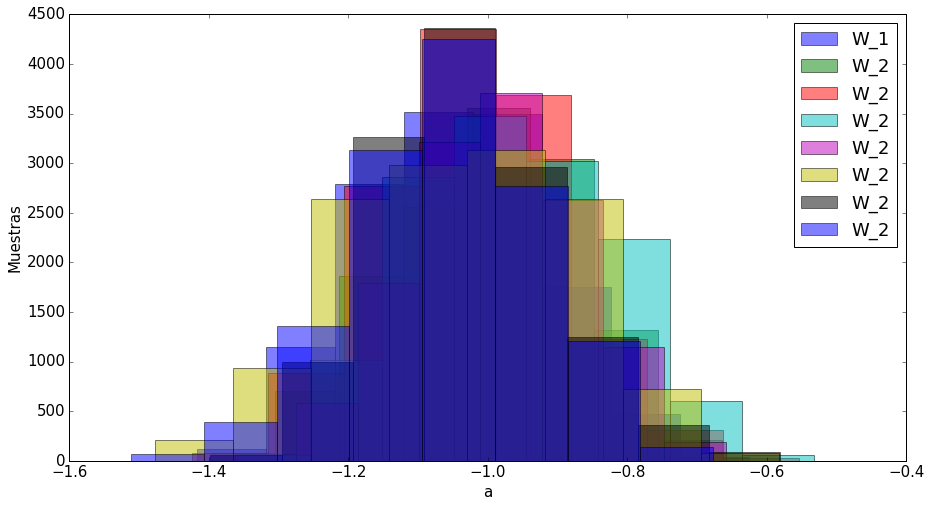

In [57]:
nb = 8
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.hist(x1[int(Nmuestras/3):], alpha = 0.5, label = 'W_1', bins=nb)
plt.hist(x2[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x3[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x4[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x5[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x6[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x7[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x8[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.xlabel('a')
plt.ylabel('Muestras')
plt.legend()

Se hace un histograma del numero de muestras para el parametro 'b'. Se hace un 'burning' de un tercio de las muestras.

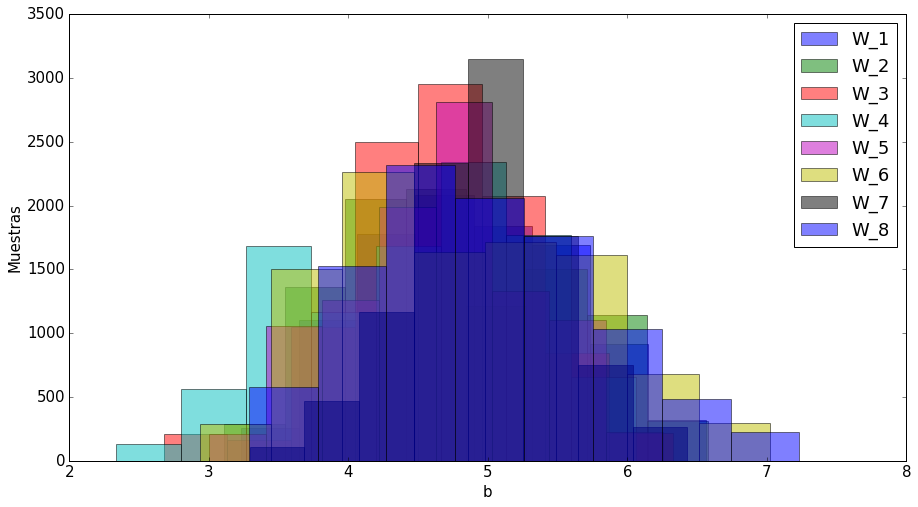

In [58]:
nb = 8
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.hist(y1[int(Nmuestras/2):], alpha = 0.5, label = 'W_1', bins=nb)
plt.hist(y2[int(Nmuestras/2):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(y3[int(Nmuestras/2):], alpha = 0.5, label = 'W_3', bins=nb)
plt.hist(y4[int(Nmuestras/2):], alpha = 0.5, label = 'W_4', bins=nb)
plt.hist(y5[int(Nmuestras/2):], alpha = 0.5, label = 'W_5', bins=nb)
plt.hist(y6[int(Nmuestras/2):], alpha = 0.5, label = 'W_6', bins=nb)
plt.hist(y7[int(Nmuestras/2):], alpha = 0.5, label = 'W_7', bins=nb)
plt.hist(y8[int(Nmuestras/2):], alpha = 0.5, label = 'W_8', bins=nb)
plt.xlabel('b')
plt.ylabel('Muestras')
plt.legend()

Se grafica un solo caminador para generar la grafica de esquina. Se hace un 'burning' de un tercio de las muestras.

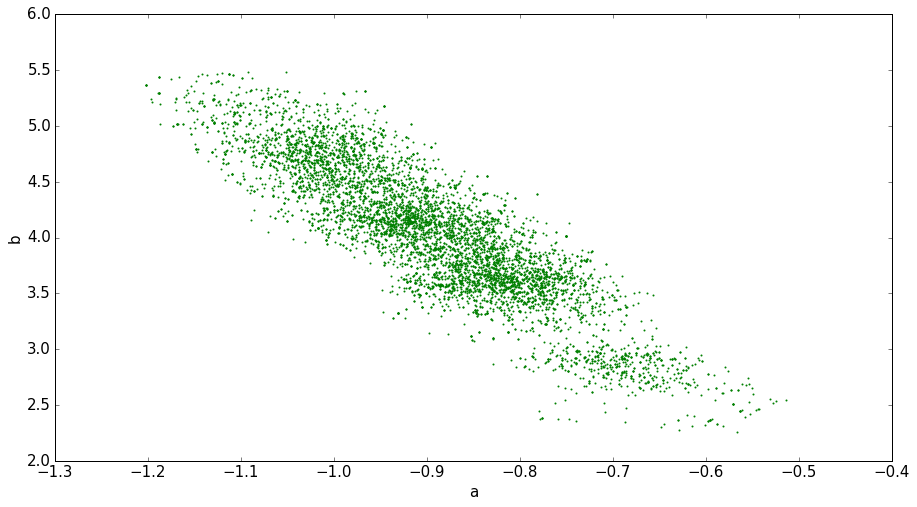

In [208]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(x1[int(Nmuestras/3):], y1[int(Nmuestras/3):], color = 'g', s=1) # primer caminador

Se genera la grafica de esquina usando la libreria corner. Se hace un 'burning' de un tercio de las muestras.

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


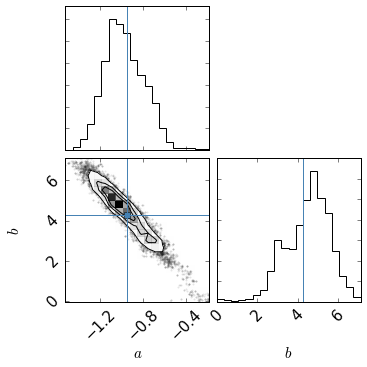

In [97]:
camino1 = np.array([x1[:], y1[:]])
fig = corner.corner(camino1.T,labels=["$a$", "$b$"], truths=[-0.95, 4.29])
fig.show()

Se generan las grafias de corner para cuatro caminadores mas. Se hace un 'burning' de un medio de las muestras.

/home/luiscantero/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


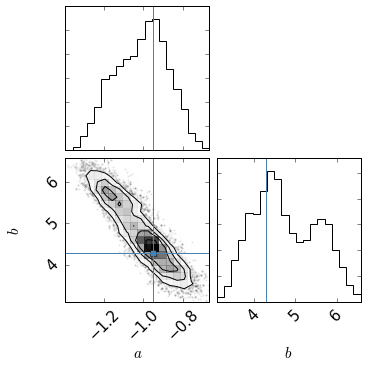

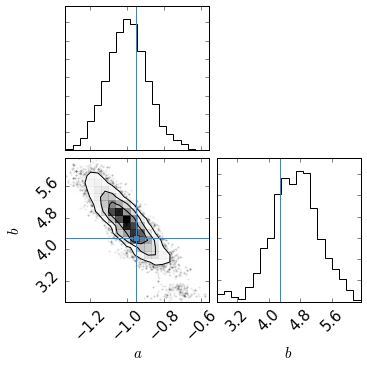

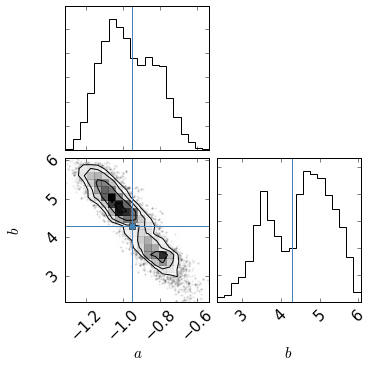

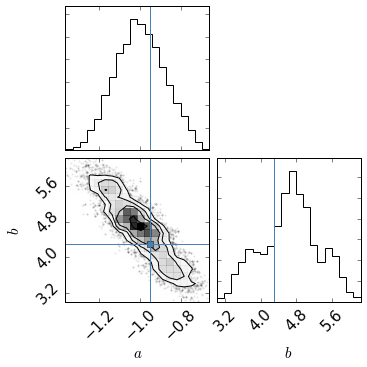

In [66]:
camino2 = np.array([x2[int(Nmuestras/2):], y2[int(Nmuestras/2):]])
camino3 = np.array([x3[int(Nmuestras/2):], y3[int(Nmuestras/2):]])
camino4 = np.array([x4[int(Nmuestras/2):], y4[int(Nmuestras/2):]])
camino5 = np.array([x5[int(Nmuestras/2):], y5[int(Nmuestras/2):]])


fig = corner.corner(camino2.T,labels=["$a$", "$b$"], truths=[-0.95, 4.29])
fig = corner.corner(camino3.T,labels=["$a$", "$b$"], truths=[-0.95, 4.29])
fig = corner.corner(camino4.T,labels=["$a$", "$b$"], truths=[-0.95, 4.29])
fig = corner.corner(camino5.T,labels=["$a$", "$b$"], truths=[-0.95, 4.29])

fig.show()

Se hace una grafica del numero de pasos - valor del parametro, se puede ver como los puntos se mueven alrededor de un valor definido. Se hace un 'burning' de un medio de las muestras.

Text(0,0.5,'a')

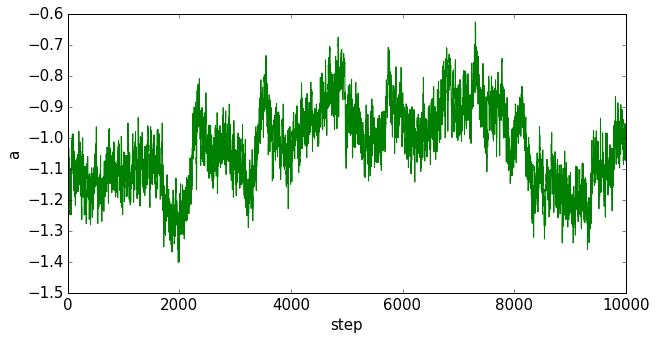

In [62]:
# Caminador 1
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':15})
plt.plot(np.arange(len(x1[int(Nmuestras/2):])), x1[int(Nmuestras/2):], color = 'g')
plt.xlabel('step')
plt.ylabel('a')

Text(0,0.5,'b')

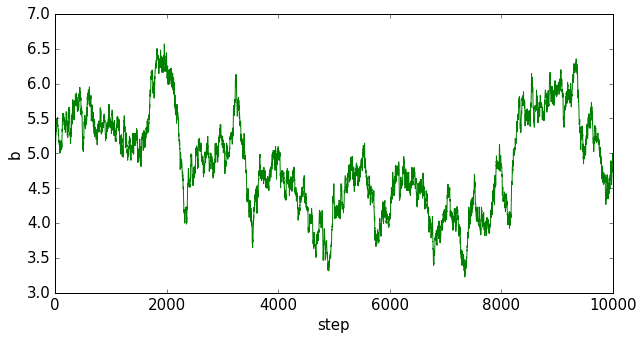

In [63]:
# Caminador 1
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':15})
plt.plot(np.arange(len(x1[int(Nmuestras/2):])), y1[int(Nmuestras/2):], color = 'g')
plt.xlabel('step')
plt.ylabel('b')

Se hacen las mismas graficas para otra muestra

Text(0,0.5,'a')

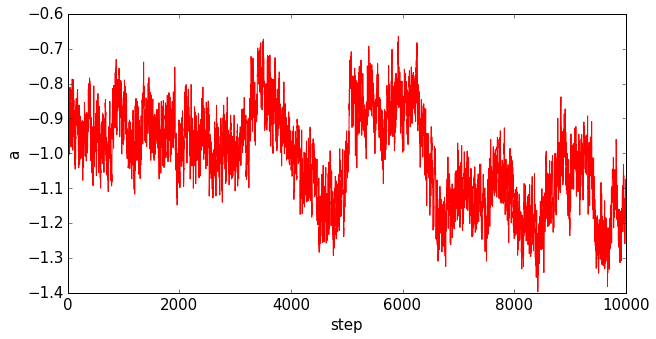

In [64]:
#Caminadr 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':15})
plt.plot(np.arange(len(x2[int(Nmuestras/2):])), x2[int(Nmuestras/2):], color = 'r')
plt.xlabel('step')
plt.ylabel('a')

Text(0,0.5,'b')

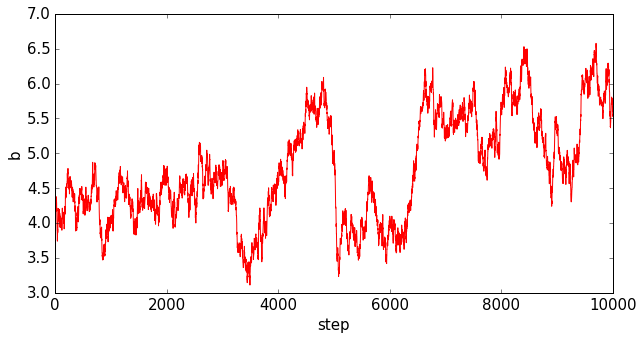

In [65]:
#Camindaor 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size':15})
plt.plot(np.arange(len(x2[int(Nmuestras/2):])), y2[int(Nmuestras/2):], color = 'r')
plt.xlabel('step')
plt.ylabel('b')